In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sqlite3
from scipy.stats import zscore
from pandas.plotting import table
import plotly.graph_objects as go

In [9]:
HrData=pd.read_csv('C:\\Users\\halkhthran.t\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
HrData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<Figure size 1000x1000 with 0 Axes>

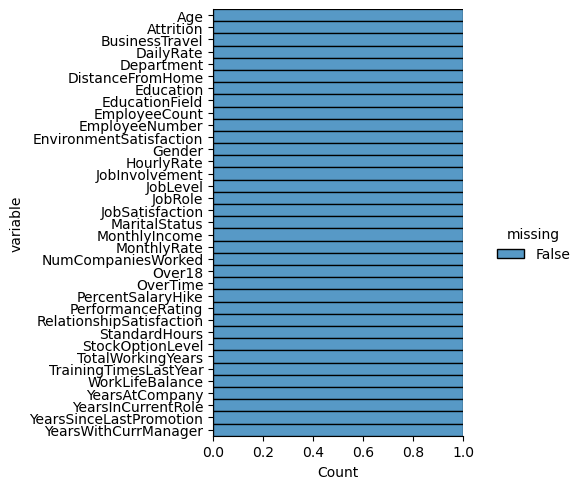

In [11]:
plt.figure(figsize=(10,10))
sns.displot(
       data=HrData.isna().melt(value_name='missing'),
       y='variable',
       hue='missing',
       multiple='fill'
   )

In [12]:
# Select only numerical columns
numerical_cols = HrData.select_dtypes(include=['int64', 'float64']).columns

# Dictionary to store outlier counts
outlier_counts = {}

# Calculate Z-scores and count outliers for each numerical column
for col in numerical_cols:
    z_scores = zscore(HrData[col])
    outliers = (abs(z_scores) > 3).sum()
    outlier_counts[col] = outliers

# Print the results
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")
    

Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 0 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 0 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 0 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 0 outliers
TotalWorkingYears: 16 outliers
TrainingTimesLastYear: 0 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 25 outliers
YearsInCurrentRole: 13 outliers
YearsSinceLastPromotion: 42 outliers
YearsWithCurrManager: 14 outliers


C:\Users\halkhthran.t\AppData\Local\Temp\ipykernel_28240\1318399182.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(HrData[col])
C:\Users\halkhthran.t\AppData\Local\Temp\ipykernel_28240\1318399182.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(HrData[col])


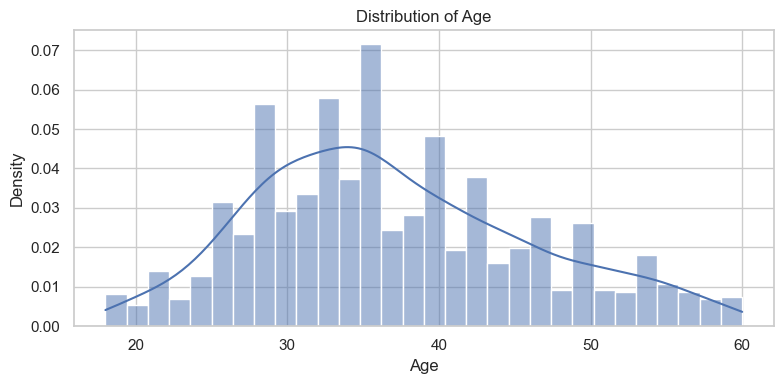

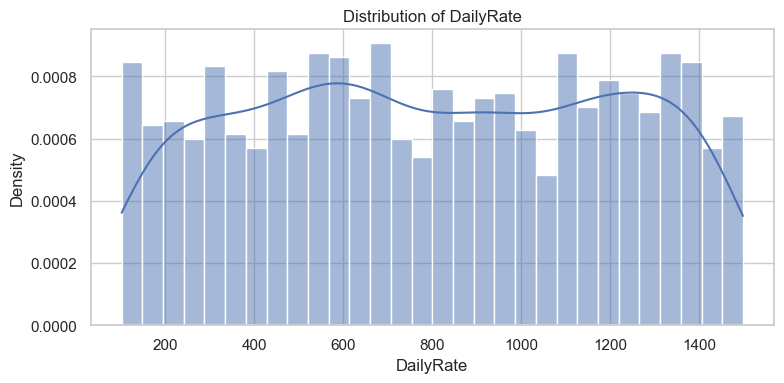

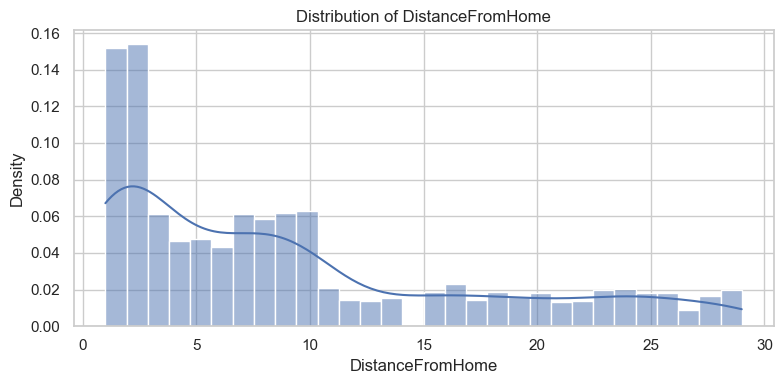

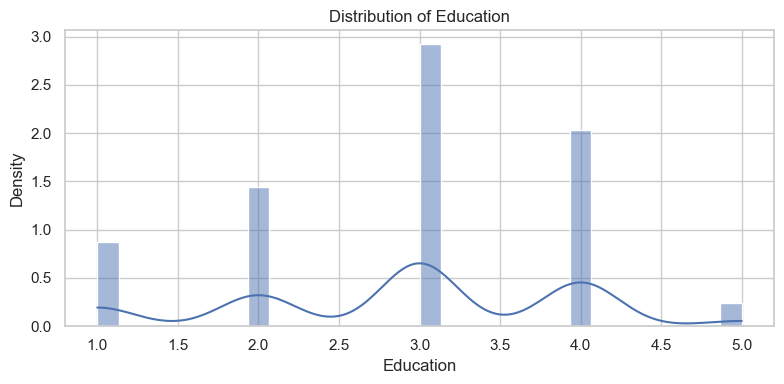

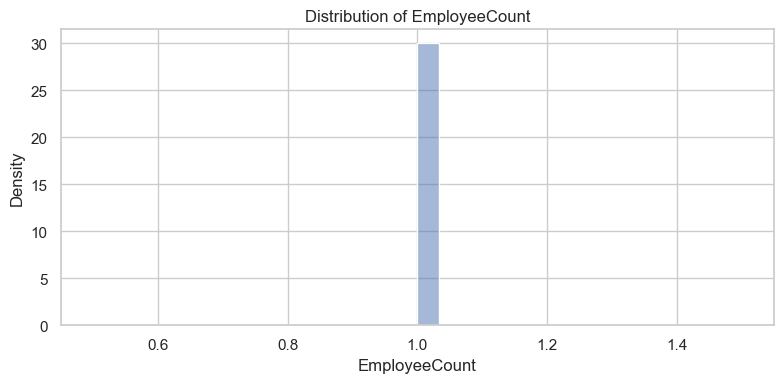

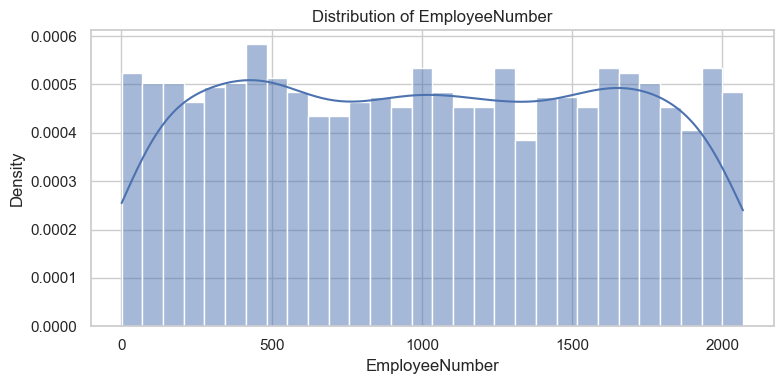

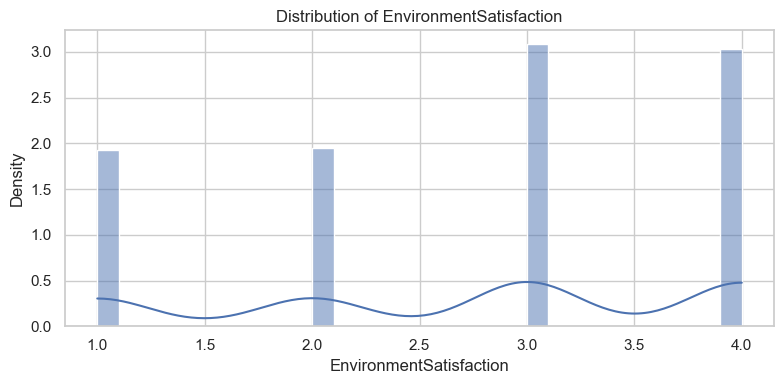

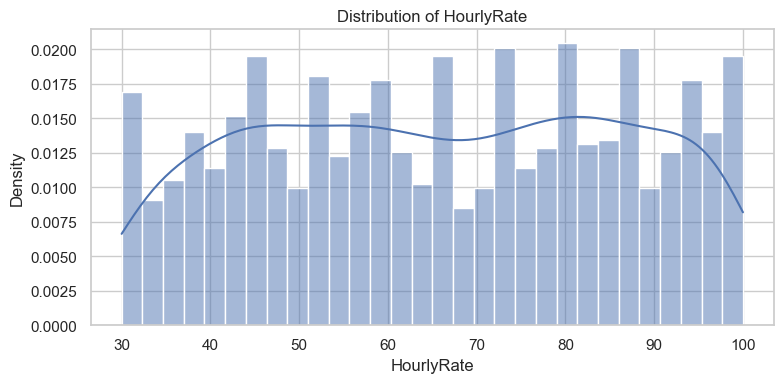

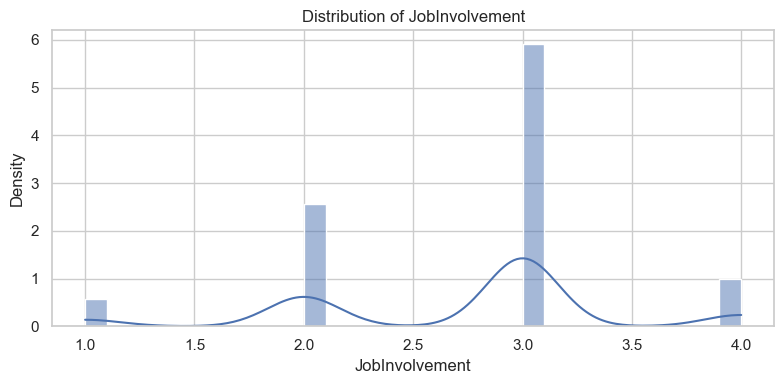

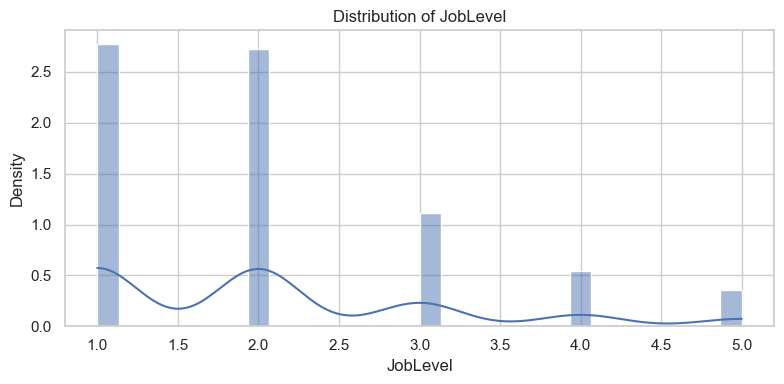

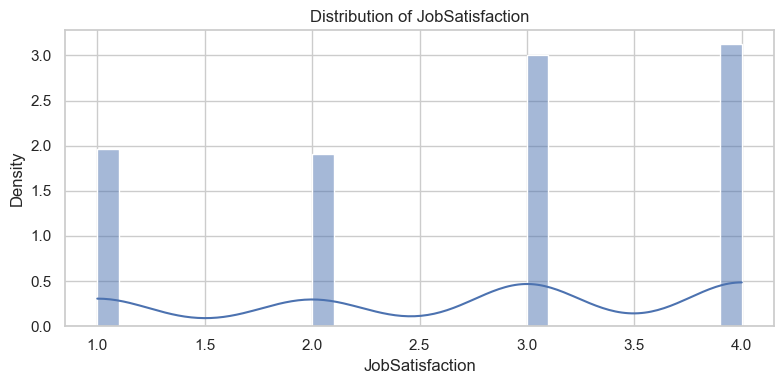

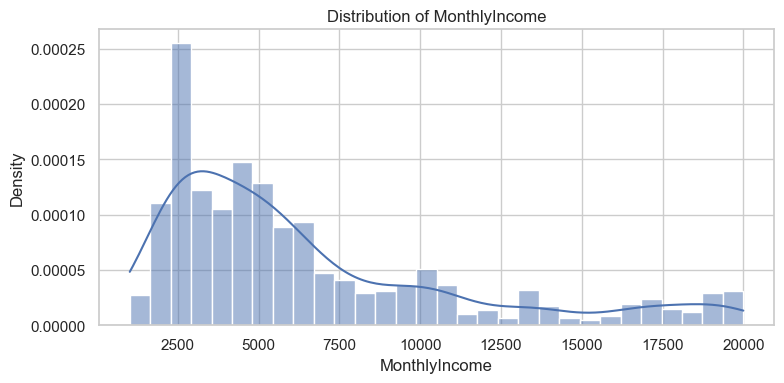

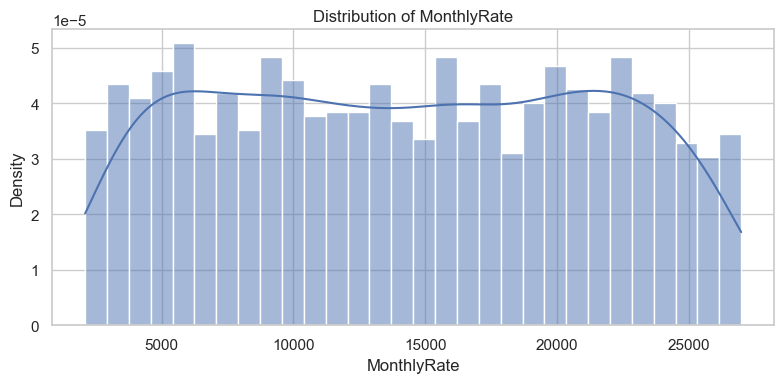

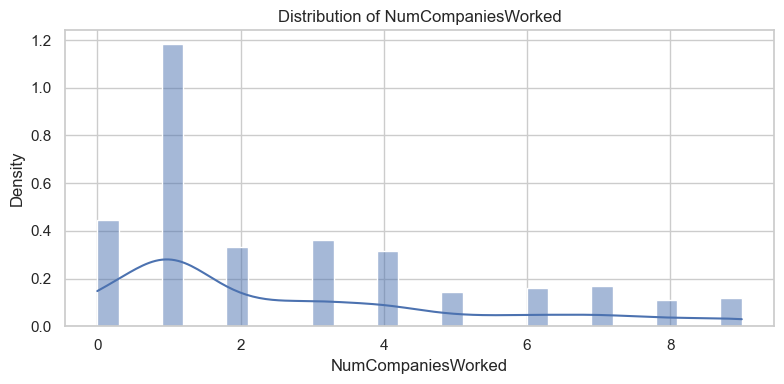

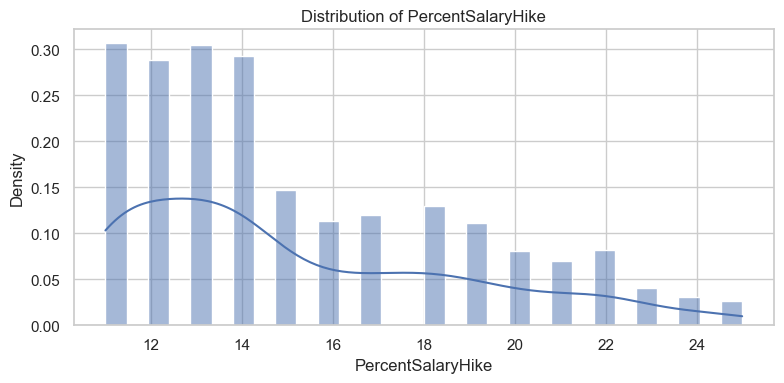

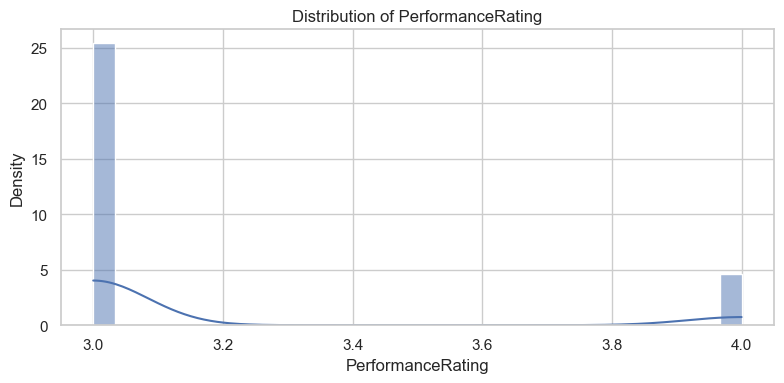

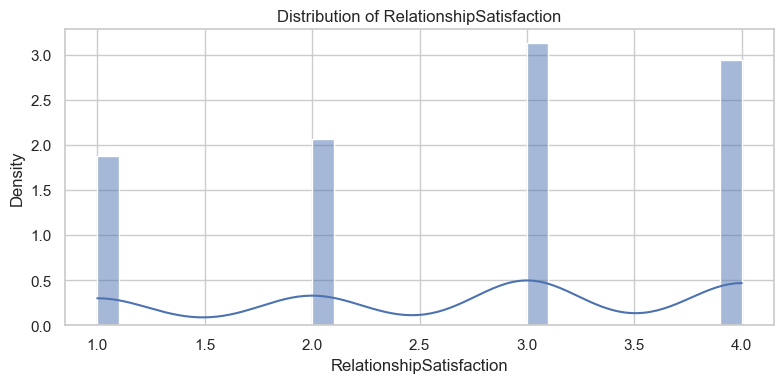

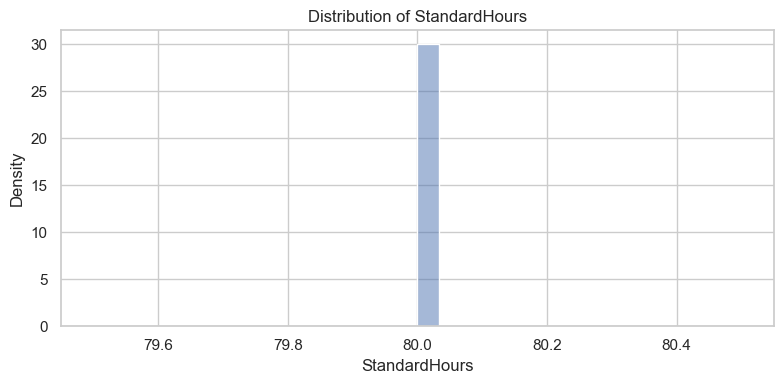

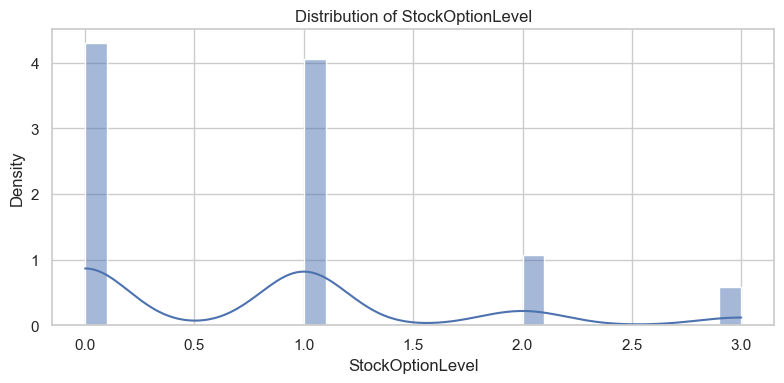

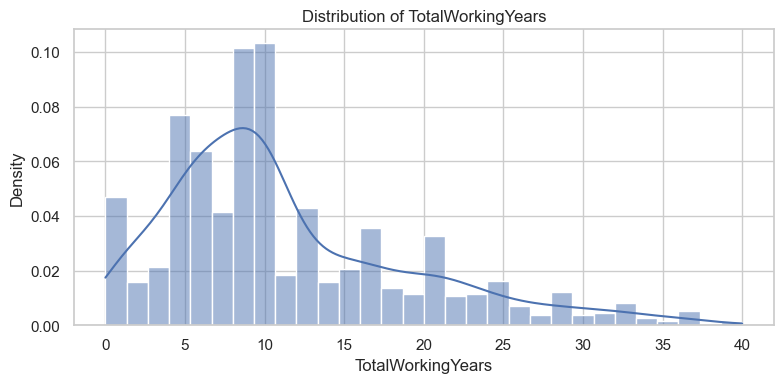

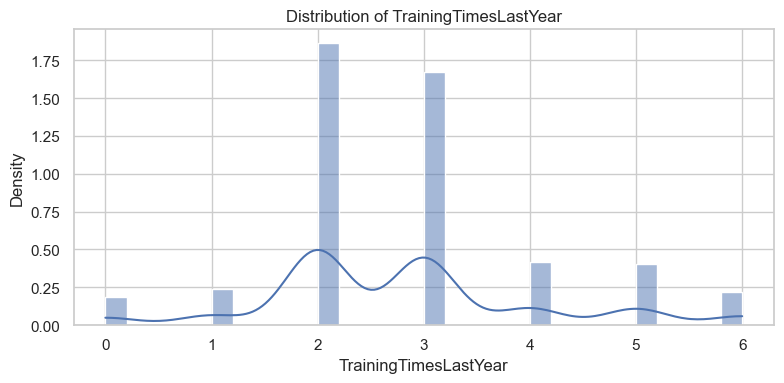

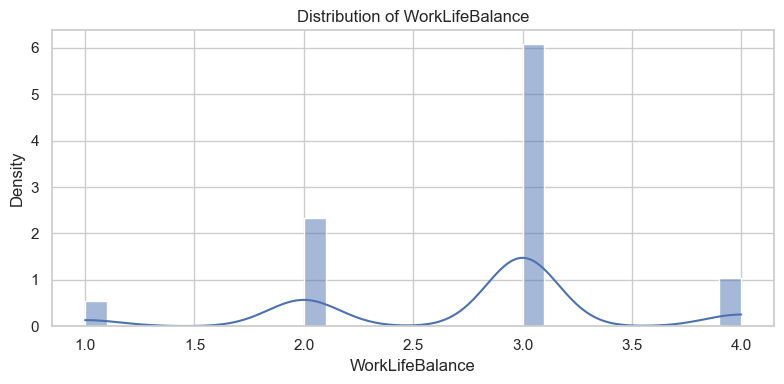

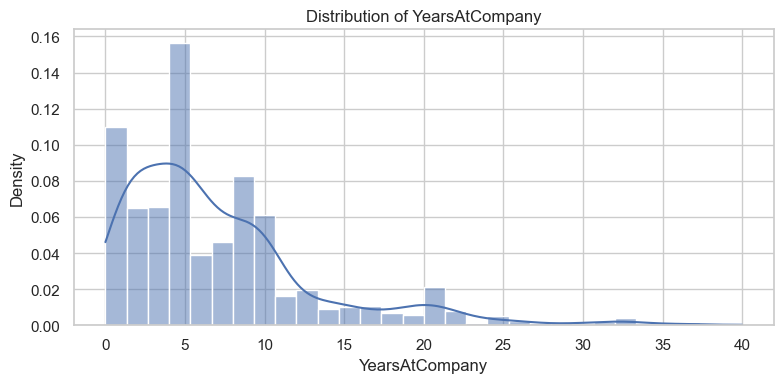

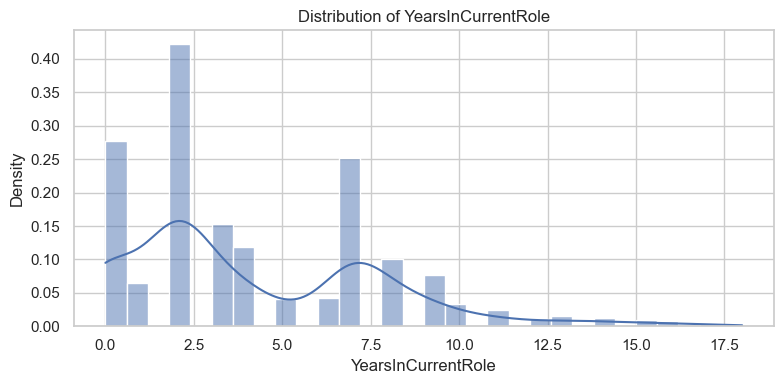

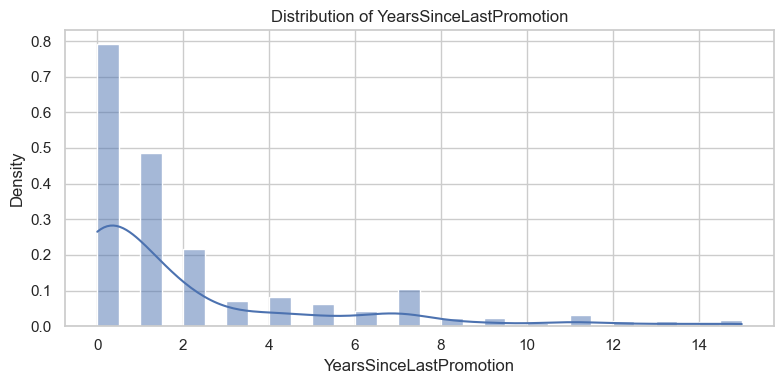

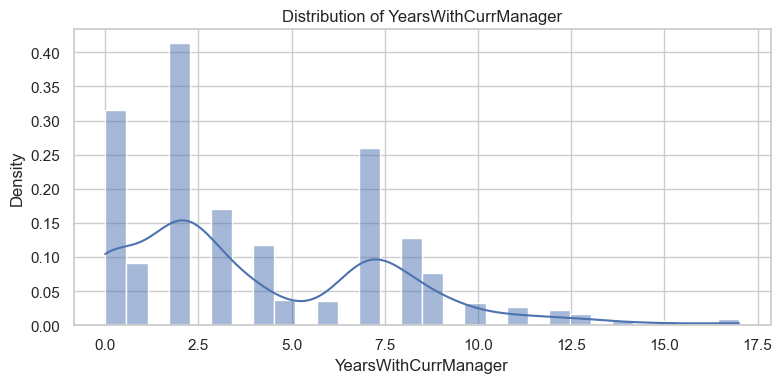

In [43]:
# Identify numerical columns
numerical_columns = HrData.select_dtypes(include=['int64', 'float64']).columns
# Set seaborn style
sns.set(style="whitegrid")

# Generate and save distribution plots
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(HrData[column], kde=True, stat="density", bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.savefig(f'distribution_{column}.png')
    plt.show()


In [20]:
# Connect to if exist the SQLite database
conn = sqlite3.connect("employees.db")


# Create a new table and insert all data
HrData.to_sql("employees", conn, if_exists="replace", index=False)

conn.close()

In [17]:
#Mack shower we load the data riht
# Connect to the database
conn = sqlite3.connect("employees.db")

# View the first 5 rows of the 'employees' table
df = pd.read_sql_query("SELECT * FROM employees LIMIT 5;", conn)
print(df)

# Optional: View column names
print("\nColumns in the table:")
print(df.columns.tolist())

# Close the connection
conn.close()

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [17]:
#How many total employees are there?

# SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT COUNT(EmployeeCount)
FROM employees;
"""
empl_counts = pd.read_sql_query(query, conn)
print(empl_counts)

conn.close()

#Python
print(HrData['EmployeeCount'].sum())

   COUNT(EmployeeCount)
0                  1470
1470


               Department  COUNT(EmployeeCount)
0         Human Resources                    63
1  Research & Development                   961
2                   Sales                   446
               Department  EmployeeCount
0         Human Resources             63
1  Research & Development            961
2                   Sales            446


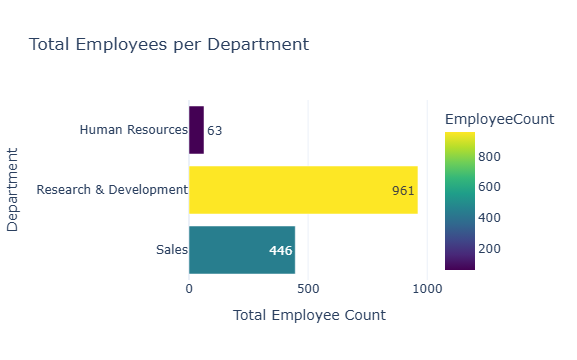

In [41]:
# What is the employee count for each department?

# SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT Department, COUNT(EmployeeCount)
FROM employees
GROUP BY Department;
"""
empl_countsD= pd.read_sql_query(query, conn)
print(empl_countsD)
conn.close()

#Python
Empl_countDP = HrData.groupby('Department')['EmployeeCount'].sum().reset_index()

print(Empl_countDP)
# Create interactive bar chart
fig = px.bar(
    Empl_countDP,
    x='EmployeeCount',      
    y='Department',
    orientation='h',         
    color='EmployeeCount',   
    text='EmployeeCount',   
    title='Total Employees per Department',
    color_continuous_scale='Viridis' 
)

# Customize layout
fig.update_layout(
    xaxis_title='Total Employee Count',
    yaxis_title='Department',
    yaxis=dict(autorange="reversed"),  
    template='plotly_white'             
)


fig.show()

                     JobRole  AVG(MonthlyIncome)
0  Healthcare Representative         7528.763359
1            Human Resources         4235.750000
2      Laboratory Technician         3237.169884
3                    Manager        17181.676471
4     Manufacturing Director         7295.137931
5          Research Director        16033.550000
6         Research Scientist         3239.972603
7            Sales Executive         6924.279141
8       Sales Representative         2626.000000


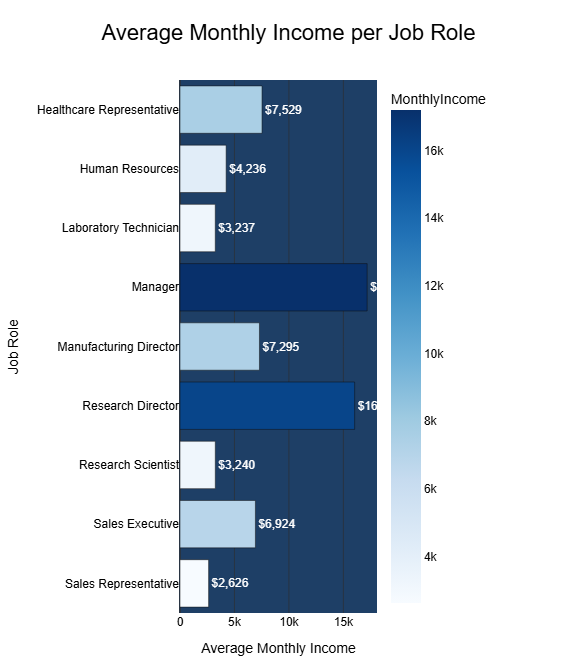

In [71]:
# What is the average monthly income by job role?


# SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT JobRole, AVG(MonthlyIncome)
FROM employees
GROUP BY JobRole;
"""
empl_AVGD= pd.read_sql_query(query, conn)
print(empl_AVGD)
conn.close()

#Python
Empl_AVGDP = HrData.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
Empl_AVGDP['MonthlyIncome'] = Empl_AVGDP['MonthlyIncome'].round(0)


fig = px.bar(
    Empl_AVGDP,
    x='MonthlyIncome',
    y='JobRole',
    orientation='h',
    color='MonthlyIncome',
    text='MonthlyIncome',
    color_continuous_scale='Blues',
    title='Average Monthly Income per Job Role',
    template='plotly_dark',
    width=1000,
    height=650
)

# Customize layout
fig.update_layout(
    xaxis_title='Average Monthly Income',
    yaxis_title='Job Role',
    yaxis=dict(autorange="reversed"),
    title_font_size=22,
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    plot_bgcolor='#1E3F66',
    paper_bgcolor='white',
    margin=dict(l=150, r=200, t=80, b=50)  
)


fig.update_traces(
    texttemplate='%{text:$,.0f}',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

In [89]:
# Who are the top 5 employees by performance rating?

# SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT EmployeeNumber, MAX(PerformanceRating) AS MaxRating
FROM employees
GROUP BY EmployeeNumber
ORDER BY MaxRating DESC , EmployeeNumber ASC
LIMIT 5;
"""
empl_MAXD= pd.read_sql_query(query, conn)
print(empl_MAXD)
conn.close()


#Python

top5 = (
    HrData.groupby("EmployeeNumber")["PerformanceRating"]
          .max()
          .reset_index(name="MaxRating")
          .sort_values(["MaxRating", "EmployeeNumber"], ascending=[False, True])  # tie-breaker!
          .head(5)
)

print(top5)

top5_full = (
    HrData.merge(top5, on="EmployeeNumber")
          .query("PerformanceRating == MaxRating")
          .drop(columns="MaxRating")
          .sort_values(["PerformanceRating", "EmployeeNumber"], ascending=[False, True])
)

top5_full


   EmployeeNumber  MaxRating
0               2          4
1              10          4
2              11          4
3              12          4
4              27          4
    EmployeeNumber  MaxRating
1                2          4
6               10          4
7               11          4
8               12          4
21              27          4


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
1,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
2,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
3,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
4,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3


               Department  AvgRating
0         Human Resources   3.142857
1  Research & Development   3.162331
2                   Sales   3.136771
               Department  AvgRating
0         Human Resources   3.142857
1  Research & Development   3.162331
2                   Sales   3.136771


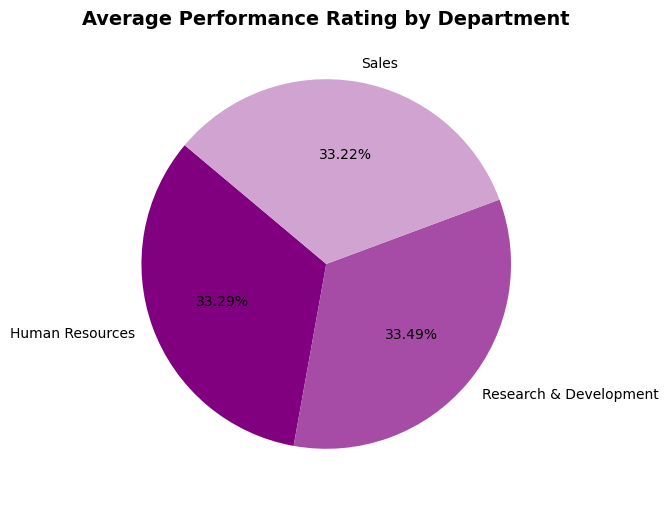

In [98]:
#Which department has the highest average performance rating?


# SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT Department, AVG(PerformanceRating) AS AvgRating
FROM employees
GROUP BY Department;
"""
empl_AVGDRating= pd.read_sql_query(query, conn)
print(empl_AVGDRating)
conn.close()


#Python

empl_AVGDRatingP = (HrData.groupby("Department")["PerformanceRating"].mean().reset_index(name="AvgRating"))

print(empl_AVGDRatingP)


plt.figure(figsize=(6,6))
plt.pie(
    empl_AVGDRatingP["AvgRating"],
    labels=empl_AVGDRatingP["Department"],
    autopct="%1.2f%%",
    startangle=140,
    colors=["#800080", "#a64ca6", "#d1a3d1"]  
)

plt.title("Average Performance Rating by Department", fontsize=14, weight="bold")
plt.show()


   Education  AvgMonthlyIncome
0          5       8277.645833
1          4       6832.402010
2          3       6517.263986
3          2       6226.645390
4          1       5640.570588
   Education  AvgMonthlyIncome
4          5       8277.645833
3          4       6832.402010
2          3       6517.263986
1          2       6226.645390
0          1       5640.570588


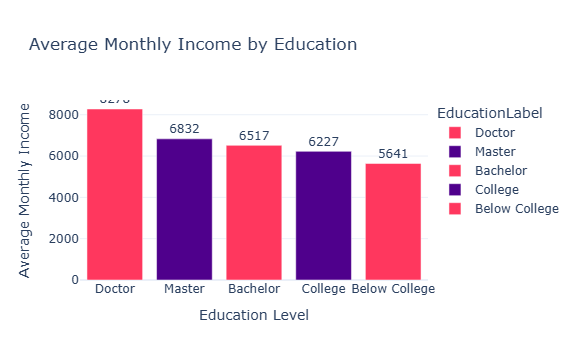

In [107]:
# What is the average monthly income by education ?

#SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT Education, AVG(MonthlyIncome) AS AvgMonthlyIncome
FROM employees
GROUP BY Education
ORDER BY Education DESC ;
"""
empl_monthly_income= pd.read_sql_query(query, conn)
print(empl_monthly_income)
conn.close()

#Python 
empl_monthly_incomeP = (
    HrData.groupby("Education")["MonthlyIncome"]
          .mean()
          .reset_index(name="AvgMonthlyIncome")
          .sort_values(by="Education", ascending=False)  
)
print(empl_monthly_incomeP)



education_map = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}

empl_monthly_incomeP["EducationLabel"] = empl_monthly_incomeP["Education"].map(education_map)

# Custom color palette
custom_colors = ["#ff375e", "#4f008c"]

fig = px.bar(
    empl_monthly_incomeP,
    x="EducationLabel",
    y="AvgMonthlyIncome",
    text="AvgMonthlyIncome",
    title="Average Monthly Income by Education",
    color="EducationLabel",  
    color_discrete_sequence=custom_colors * (len(empl_monthly_incomeP)//len(custom_colors) + 1) 
)

fig.update_traces(texttemplate='%{text:.0f}', textposition="outside")
fig.update_layout(
    xaxis_title="Education Level",
    yaxis_title="Average Monthly Income",
    template="plotly_white"
)
fig.show()

                     JobRole  AvgTrainingTimesLastYear  AvgRating
0                    Manager                  2.813725   3.196078
1     Manufacturing Director                  2.744828   3.186207
2         Research Scientist                  2.664384   3.167808
3      Laboratory Technician                  2.949807   3.162162
4  Healthcare Representative                  2.748092   3.152672
5       Sales Representative                  3.012048   3.144578
6            Human Resources                  2.557692   3.134615
7            Sales Executive                  2.831288   3.125767
8          Research Director                  2.775000   3.100000


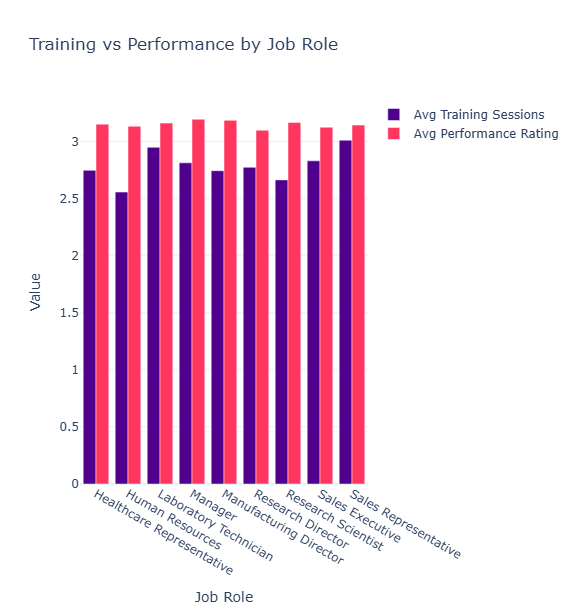

In [113]:
# Which job roles have the highest average training time, and how does it affect performance?
#SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT JobRole, AVG(TrainingTimesLastYear) AS AvgTrainingTimesLastYear , AVG(PerformanceRating) AS AvgRating
FROM employees
GROUP BY JobRole
ORDER BY AvgRating DESC;
"""
empl_trainingSQL= pd.read_sql_query(query, conn)
print(empl_trainingSQL)
conn.close()


# Python
role_stats = (
    HrData.groupby("JobRole")
          .agg(AvgTraining=("TrainingTimesLastYear", "mean"),
               AvgRating=("PerformanceRating", "mean"),
               N=("EmployeeNumber", "count"))
          .reset_index()
)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=role_stats["JobRole"],
    y=role_stats["AvgTraining"],
    name="Avg Training Sessions",
    marker_color="#4f008c"
))

fig.add_trace(go.Bar(
    x=role_stats["JobRole"],
    y=role_stats["AvgRating"],
    name="Avg Performance Rating",
    marker_color="#ff375e"
))

# Layout
fig.update_layout(
    barmode="group",
    title="Training vs Performance by Job Role",
    xaxis_title="Job Role",
    yaxis_title="Value",
    template="plotly_white",
    width=1000,
    height=600
)

fig.show()


                     JobRole  AvgTotalWorkingYears  AvgRating
0                    Manager             24.549020   3.196078
1     Manufacturing Director             12.786207   3.186207
2         Research Scientist              7.715753   3.167808
3      Laboratory Technician              7.656371   3.162162
4  Healthcare Representative             14.068702   3.152672
5       Sales Representative              4.674699   3.144578
6            Human Resources              8.173077   3.134615
7            Sales Executive             11.101227   3.125767
8          Research Director             21.400000   3.100000
                     JobRole  AvgWorkingYears  AvgRating
3                    Manager        24.549020   3.196078
4     Manufacturing Director        12.786207   3.186207
6         Research Scientist         7.715753   3.167808
2      Laboratory Technician         7.656371   3.162162
0  Healthcare Representative        14.068702   3.152672
8       Sales Representative         4

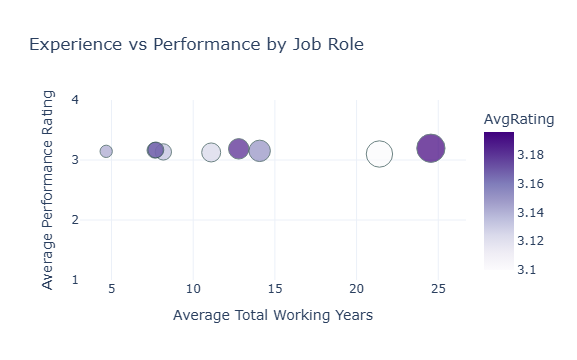

In [116]:
# Which job roles have the highest average TotalWorkingYears, and how does it affect performance?
#SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT JobRole, AVG(TotalWorkingYears) AS AvgTotalWorkingYears, AVG(PerformanceRating) AS AvgRating
FROM employees
GROUP BY JobRole
ORDER BY AvgRating DESC;

"""
empl_trainingSQL= pd.read_sql_query(query, conn)
print(empl_trainingSQL)
conn.close()


# Python
role_stats = (
    HrData.groupby("JobRole")
          .agg(AvgWorkingYears=("TotalWorkingYears", "mean"),
               AvgRating=("PerformanceRating", "mean"))
          .reset_index()
)

print(role_stats.sort_values("AvgRating", ascending=False))

fig = px.scatter(
    role_stats,
    x="AvgWorkingYears",
    y="AvgRating",
    size="AvgWorkingYears",     
    color="AvgRating",         
    hover_name="JobRole",
    title="Experience vs Performance by Job Role",
    color_continuous_scale=px.colors.sequential.Purples,
    template="plotly_white"
)

fig.update_traces(marker=dict(line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(
    xaxis_title="Average Total Working Years",
    yaxis_title="Average Performance Rating",
    yaxis=dict(range=[1, 4])  
)
fig.show()

   WorkLifeBalance  AttritionRate  EmployeeCount
0                1       0.312500             80
1                2       0.168605            344
2                3       0.142217            893
3                4       0.176471            153
   WorkLifeBalance  AttritionRate  EmployeeCount
0                1       0.312500             80
1                2       0.168605            344
2                3       0.142217            893
3                4       0.176471            153


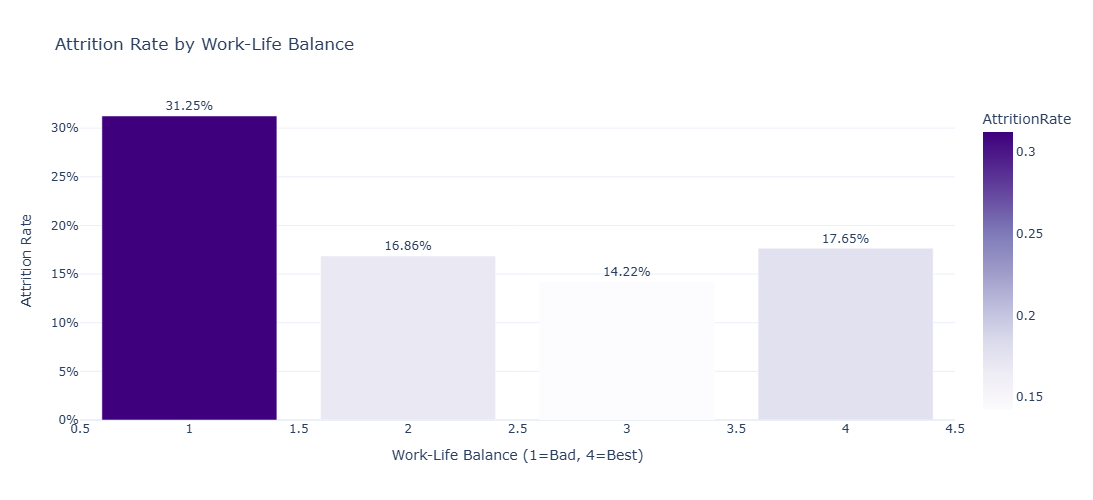

In [120]:
# Does work-life balance score influence attrition?

#SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
SELECT WorkLifeBalance,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS AttritionRate,
       COUNT(*) AS EmployeeCount
FROM employees
GROUP BY WorkLifeBalance
ORDER BY WorkLifeBalance;

"""
empl_AttritionSQL= pd.read_sql_query(query, conn)
print(empl_AttritionSQL)
conn.close()



#Python
wlb_attrition = (
    HrData.groupby("WorkLifeBalance")["Attrition"]
          .apply(lambda x: (x == "Yes").mean())  
          .reset_index(name="AttritionRate")
)

wlb_attrition["EmployeeCount"] = HrData.groupby("WorkLifeBalance")["Attrition"].count().values

print(wlb_attrition)


import plotly.express as px

fig = px.bar(
    wlb_attrition,
    x="WorkLifeBalance",
    y="AttritionRate",
    text="AttritionRate",
    title="Attrition Rate by Work-Life Balance",
    color="AttritionRate",
    color_continuous_scale=px.colors.sequential.Purples,
    template="plotly_white"
)

fig.update_traces(texttemplate='%{text:.2%}', textposition="outside")
fig.update_layout(
    xaxis_title="Work-Life Balance (1=Bad, 4=Best)",
    yaxis_title="Attrition Rate",
    yaxis_tickformat=".0%",
    width=800,
    height=500
)
fig.show()


               Department OverTime  AvgPerformance  AttritionRate  \
0         Human Resources       No        3.130435       0.152174   
1         Human Resources      Yes        3.176471       0.294118   
2  Research & Development       No        3.169565       0.085507   
3  Research & Development      Yes        3.143911       0.273063   
4                   Sales       No        3.119497       0.138365   
5                   Sales      Yes        3.179688       0.375000   

   EmployeeCount  
0             46  
1             17  
2            690  
3            271  
4            318  
5            128  
               Department OverTime  AvgPerformance  AttritionRate  \
0         Human Resources       No            3.13          15.22   
1         Human Resources      Yes            3.18          29.41   
2  Research & Development       No            3.17           8.55   
3  Research & Development      Yes            3.14          27.31   
4                   Sales       No    

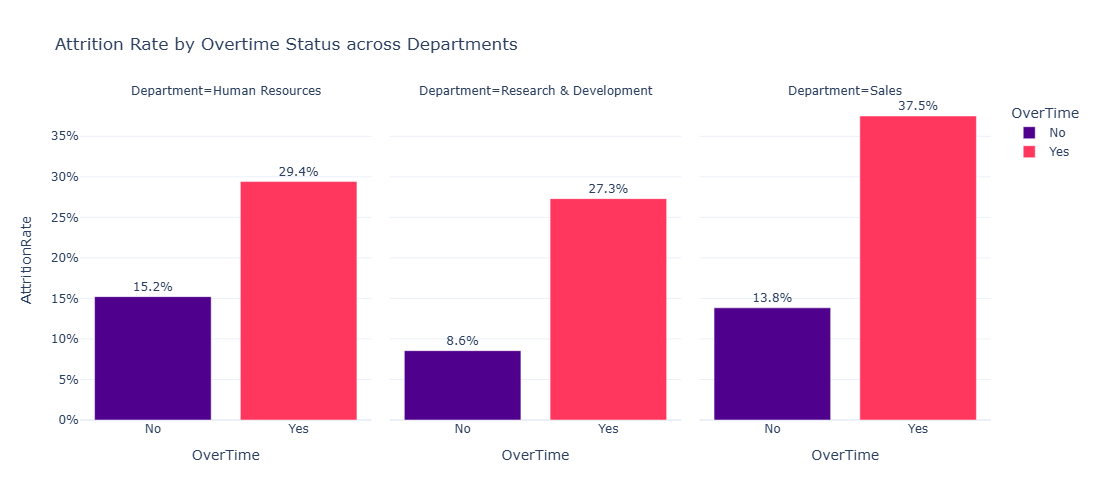

In [121]:
# Does work-life balance score influence attrition?

#SQL 
# Connect to SQLite database
conn = sqlite3.connect("employees.db")

query="""
-- Overtime vs Performance & Attrition (by Department)
SELECT
  Department,
  OverTime,
  AVG(PerformanceRating) AS AvgPerformance,
  SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS AttritionRate,
  COUNT(*) AS EmployeeCount
FROM employees
GROUP BY Department, OverTime
ORDER BY Department, OverTime;

"""
empl_AttritionSQL= pd.read_sql_query(query, conn)
print(empl_AttritionSQL)
conn.close()


#Python
overtime_dept = (
    HrData.groupby(["Department", "OverTime"])
          .agg(
              AvgPerformance=("PerformanceRating", "mean"),
              AttritionRate=("Attrition", lambda s: (s == "Yes").mean()),
              EmployeeCount=("EmployeeNumber", "count")
          )
          .reset_index()
          .sort_values(["Department", "OverTime"])
)


print(
    overtime_dept
      .assign(AttritionRate=lambda df: (df["AttritionRate"]*100).round(2))
      .round({"AvgPerformance": 2})
)

fig = px.bar(
    overtime_dept,
    x="OverTime",
    y="AttritionRate",
    color="OverTime",
    facet_col="Department",
    facet_col_wrap=3,
    text=overtime_dept["AttritionRate"].mul(100).round(1).astype(str) + "%",
    color_discrete_sequence=["#4f008c", "#ff375e"],  # purple & pink
    title="Attrition Rate by Overtime Status across Departments",
    template="plotly_white",
    height=500
)

fig.update_traces(textposition="outside")
fig.update_layout(yaxis_tickformat=".0%")
fig.show()